# Creating a xG Model

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the df
df = pd.read_csv("xg_model.csv")

## 1. Exploratory Data Analysis

In [3]:
df.head()

,x,y,is_goal,period,Assisted,Zone,IndividualPlay,RegularPlay,LeftFoot,RightFoot,...,Volley,FastBreak,ThrowinSetPiece,Penalty,OneOnOne,KeyPass,DirectFreekick,OwnGoal,OtherBodyPart,DirectCorner
0,80.8,51.6,False,SecondHalf,True,Center,True,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,79.3,24.2,False,SecondHalf,True,Center,True,True,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,80.0,59.5,False,SecondHalf,True,Center,NaN,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,89.8,55.6,False,SecondHalf,True,Center,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,84.9,56.2,False,SecondHalf,True,Center,NaN,True,True,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each observation represents a shot and contains information such as if the player used his left foot or his right foot to shoot the ball.

The x and y variables helps us locate the place in the field where the shot was taken from and their values represent how far away from the team's own goal was the shot taken.
 - x represents the horizontal axis
 - y represents the vertical axis

In [4]:
print(f"Our dataset contains {df.shape[0]} shots and {df.shape[1]} different features about them.")

Our dataset contains 8118 shots and 25 different features about them.


In [5]:
print(df.x.max())
print(df.x.min())

99.6
0.8


In [6]:
print(df.y.max())
print(df.y.min())

99.6
3.1


To understand these values easier:
- Our own goal is located at (x,y) = (0, 50)
- The opposing team own goal is located at (x,y) = (100, 50)

Think of a normal horizontal football pitch.

In [7]:
# List of Columns
list(df.columns)

['x',
 'y',
 'is_goal',
 'period',
 'Assisted',
 'Zone',
 'IndividualPlay',
 'RegularPlay',
 'LeftFoot',
 'RightFoot',
 'FromCorner',
 'FirstTouch',
 'Head',
 'BigChance',
 'SetPiece',
 'Volley',
 'FastBreak',
 'ThrowinSetPiece',
 'Penalty',
 'OneOnOne',
 'KeyPass',
 'DirectFreekick',
 'OwnGoal',
 'OtherBodyPart',
 'DirectCorner']

In [8]:
# How many own goals do we have?
df.OwnGoal.value_counts()

OwnGoal
True    27
Name: count, dtype: int64

Own goals don't provide any value when building an xG model so let's drop it.

In [9]:
# By doing this, we remove the shots that resulted in Own Goals
df = df[df["OwnGoal"] != True ]

In [10]:
# Now we can drop the column itself
df.drop('OwnGoal', axis = 1, inplace = True)

In [11]:
print(f"Our dataset now contains {df.shape[0]} shots and {df.shape[1]} features.")

Our dataset now contains 8091 shots and 24 features.


How many shots resulted in goals?

In [12]:
df.is_goal.value_counts()

is_goal
False    7097
True      994
Name: count, dtype: int64

Let's create a scatterplot to visualise from where the goals were scored.

<Axes: xlabel='x', ylabel='y'>

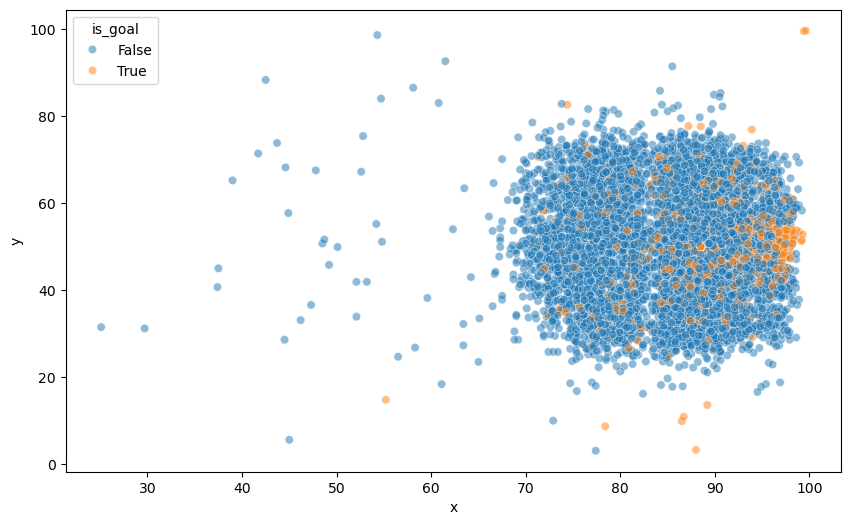

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.scatterplot(x='x', y = 'y', data =df, hue ='is_goal', alpha =.5)

In [14]:
df.isna().sum()

x                     0
y                     0
is_goal               0
period                0
Assisted           2053
Zone                  0
IndividualPlay     5289
RegularPlay        2714
LeftFoot           5307
RightFoot          4106
FromCorner         6903
FirstTouch         4166
Head               6793
BigChance          6484
SetPiece           7704
Volley             7281
FastBreak          7476
ThrowinSetPiece    7904
Penalty            7985
OneOnOne           7890
KeyPass            8033
DirectFreekick     7860
OtherBodyPart      8067
DirectCorner       8089
dtype: int64

We have a lot of missing values, but from a football perspective, if the value is missing, we can infer that it is false.

E.g. If there is a missing value for Penalty, we will assume that the shot wasn't taken from the penalty spot.

In [15]:
df.fillna(0, inplace = True)

In [16]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted            object
Zone                object
IndividualPlay      object
RegularPlay         object
LeftFoot            object
RightFoot           object
FromCorner          object
FirstTouch          object
Head                object
BigChance           object
SetPiece            object
Volley              object
FastBreak           object
ThrowinSetPiece     object
Penalty             object
OneOnOne            object
KeyPass             object
DirectFreekick      object
OtherBodyPart       object
DirectCorner        object
dtype: object

We need to change the data types of these features.

In [17]:
df = df.astype({
    'x': float,
    'y': float,
    'is_goal': bool,
    'period': str,
    'Assisted': bool,
    'Zone': str,
    'IndividualPlay':bool,
    'RegularPlay':bool,
    'LeftFoot':bool,
    'RightFoot':bool,
    'FromCorner':bool,
    'FirstTouch':bool, 
    'Head':bool,
    'BigChance': bool,
    'SetPiece': bool,
    'Volley': bool,
    'FastBreak':bool,
    'ThrowinSetPiece':bool,
    'Penalty':bool, 
    'OneOnOne':bool,
    'KeyPass': bool,
    'OtherBodyPart': bool
})

In [18]:
df.dtypes

x                  float64
y                  float64
is_goal               bool
period              object
Assisted              bool
Zone                object
IndividualPlay        bool
RegularPlay           bool
LeftFoot              bool
RightFoot             bool
FromCorner            bool
FirstTouch            bool
Head                  bool
BigChance             bool
SetPiece              bool
Volley                bool
FastBreak             bool
ThrowinSetPiece       bool
Penalty               bool
OneOnOne              bool
KeyPass               bool
DirectFreekick      object
OtherBodyPart         bool
DirectCorner        object
dtype: object

## 2. Feature Engineering

### 2.1. Shot Distance

Although we have x and y, having a feature that directly represents the distance to the goal is relevant.

In [19]:
# As I've explained before, the opposing team's goal is located at (100, 50)
goal_x = 100
goal_y = 50

df_feat_eng = df.copy()
df_feat_eng['shot_distance'] = np.sqrt((df_feat_eng['x'] - goal_x)**2 + (df_feat_eng['y'] - goal_y)**2)    

In [20]:
df_feat_eng.shot_distance.head()

0    19.266551
1    33.077636
2    22.141590
3    11.636151
4    16.323296
Name: shot_distance, dtype: float64

<Axes: >

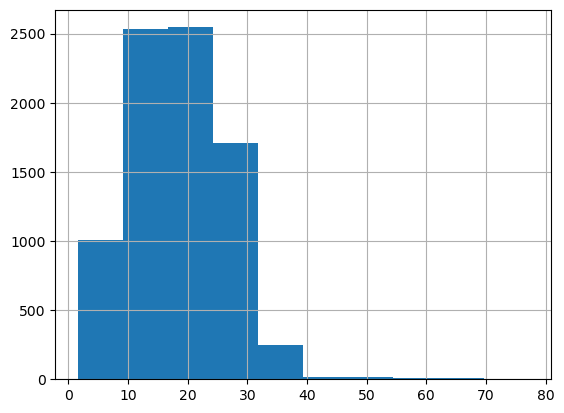

In [21]:
df_feat_eng.shot_distance.hist()

We can see that most of the shots are made from a distance of between 10 to 25 units. 

In [22]:
df_feat_eng.shot_distance.describe()

count    8091.000000
mean       18.495064
std         8.011289
min         1.581139
25%        12.061300
50%        18.380696
75%        24.200207
max        77.150891
Name: shot_distance, dtype: float64

### 2.2. Shot Angle

Knowing the shot angle towards goal is very important. 

A close shot from the goal side line is less likely to result in a goal than a long shot from a more central position.

We will use a Python function called atan2 to handle this.

In [23]:
import math

# We calculate the distances in terms of x and y:
df_feat_eng['dx_to_goal'] = df_feat_eng['x'] - goal_x
df_feat_eng['dy_to_goal'] = df_feat_eng['y'] - goal_y

# Now we calculate the angle to goal in radians
df_feat_eng['angle_to_goal_radian'] = df_feat_eng.apply(lambda row: math.atan2(row['dy_to_goal'], row['dx_to_goal']), axis=1)

# We want shots from the left side of the pitch to be understood by the model in the same way as right side shots
df_feat_eng['angle_to_goal_radian'] = df_feat_eng['angle_to_goal_radian'].abs()

# At the end we convert the angle to degrees
df_feat_eng['angle_to_goal_degrees'] = df_feat_eng['angle_to_goal_radian'].apply(math.degrees)

# Drop the angle in radians column 
df_feat_eng = df_feat_eng.drop(['angle_to_goal_radian'], axis =1)


### 2.3. Interaction Term between Shot Distance and Shot Angle

To fully capture the example I mentioned before, we need to create an interaction term between shot distance and shot angle.

In [24]:
df_feat_eng['distance_angle_interaction'] = df_feat_eng['shot_distance'] * df_feat_eng['angle_to_goal_degrees']

### 2.4. Encoding Period and Pitch Zones

We have two string features that we need to encode in order for them to be used by the model we're going to build:
- Period - if the shot was taken in the first or in the second half
- Zone - from which zone of the pitch was the shot taken from - e.g. center

In [25]:
df_feat_eng = pd.get_dummies(df_feat_eng, columns = ['period', 'Zone'])

In [26]:
list(df_feat_eng.columns)

['x',
 'y',
 'is_goal',
 'Assisted',
 'IndividualPlay',
 'RegularPlay',
 'LeftFoot',
 'RightFoot',
 'FromCorner',
 'FirstTouch',
 'Head',
 'BigChance',
 'SetPiece',
 'Volley',
 'FastBreak',
 'ThrowinSetPiece',
 'Penalty',
 'OneOnOne',
 'KeyPass',
 'DirectFreekick',
 'OtherBodyPart',
 'DirectCorner',
 'shot_distance',
 'dx_to_goal',
 'dy_to_goal',
 'angle_to_goal_degrees',
 'distance_angle_interaction',
 'period_FirstHalf',
 'period_SecondHalf',
 'Zone_Back',
 'Zone_Center',
 'Zone_Left',
 'Zone_Right']

In [27]:
df_feat_eng.period_FirstHalf.value_counts()

period_FirstHalf
False    4333
True     3758
Name: count, dtype: int64

In [28]:
df_feat_eng.period_SecondHalf.value_counts()

period_SecondHalf
True     4333
False    3758
Name: count, dtype: int64

## 3. Model Building - Logistic Regression

We'll create a logistic regression that predicts if the shot resulted in a goal or not.

In [29]:
df_model_build = df_feat_eng.copy()

In [30]:
X = df_model_build.drop('is_goal', axis=1)
y = df_model_build['is_goal']

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, brier_score_loss, roc_curve

We need to create a train:test split.

In [32]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.2, random_state= 42)

The model I'll be using is a logistic regression that predicts if a shot resulted in a goal or not.

In [33]:
model = LogisticRegression(max_iter = 1000)

In [34]:
model.fit(X_train, y_train)

/opt/anaconda3/envs/hc_env_v310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
y_pred_proba_lr = model.predict_proba (X_test)[:,1]

Let's see 10 examples of the predicted probability that a shot resulted in a goal.

In [36]:
y_pred_proba_lr[:10]

array([0.07280861, 0.29095642, 0.02558122, 0.03918555, 0.09124186,
       0.04481506, 0.02571953, 0.05475819, 0.04975751, 0.03246582])

In [37]:
final_df = X_test.copy()
final_df['goal_proba_lr'] = y_pred_proba_lr

Let's see an example of all the information we have about a shot, including the probability that it resulted in a goal.

In [38]:
final_df.iloc[30]

x                                    92.3
y                                    47.9
Assisted                             True
IndividualPlay                      False
RegularPlay                         False
LeftFoot                            False
RightFoot                           False
FromCorner                           True
FirstTouch                           True
Head                                 True
BigChance                            True
SetPiece                            False
Volley                              False
FastBreak                           False
ThrowinSetPiece                     False
Penalty                             False
OneOnOne                            False
KeyPass                             False
DirectFreekick                          0
OtherBodyPart                       False
DirectCorner                            0
shot_distance                    7.981228
dx_to_goal                           -7.7
dy_to_goal                        

We'll see the 5 shots that had the highest probability of scoring.

In [39]:
final_df.sort_values(by='goal_proba_lr', ascending=False).head()

,x,y,Assisted,IndividualPlay,RegularPlay,LeftFoot,RightFoot,FromCorner,FirstTouch,Head,...,dy_to_goal,angle_to_goal_degrees,distance_angle_interaction,period_FirstHalf,period_SecondHalf,Zone_Back,Zone_Center,Zone_Left,Zone_Right,goal_proba_lr
1323,88.5,50.0,False,False,False,True,False,False,False,False,...,0.0,180.0,2070.0,False,True,False,True,False,False,0.827567
381,88.5,50.0,False,False,False,True,False,False,False,False,...,0.0,180.0,2070.0,False,True,False,True,False,False,0.827567
6619,88.5,50.0,False,False,False,True,False,False,False,False,...,0.0,180.0,2070.0,False,True,False,True,False,False,0.827567
3671,88.5,50.0,False,False,False,True,False,False,False,False,...,0.0,180.0,2070.0,False,True,False,True,False,False,0.827567
695,88.5,50.0,False,False,False,True,False,False,False,False,...,0.0,180.0,2070.0,True,False,False,True,False,False,0.825863


These 5 shots were taken from the penalty spot!

We'll use some metrics to evaluate how well did the model perform.

In [40]:
# Evaluate the model
logloss_lr = log_loss(y_test, y_pred_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
brier_score_lr = brier_score_loss(y_test, y_pred_proba_lr)

print(f"Log Loss: {logloss_lr}")
print(f"ROC AUC: {roc_auc_lr}")
print(f"Brier Score: {brier_score_lr}")

Log Loss: 0.27227154621037775
ROC AUC: 0.8075064384184214
Brier Score: 0.07808412900781483


### 3.1. Logistic Regression - Visualising predictions

In [41]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type= 'opta')

In [42]:
from matplotlib.colors import LinearSegmentedColormap
colors = ['red', 'yellow', 'green']

# Create the custom colormap
cmap = LinearSegmentedColormap.from_list('my_colormap', colors)

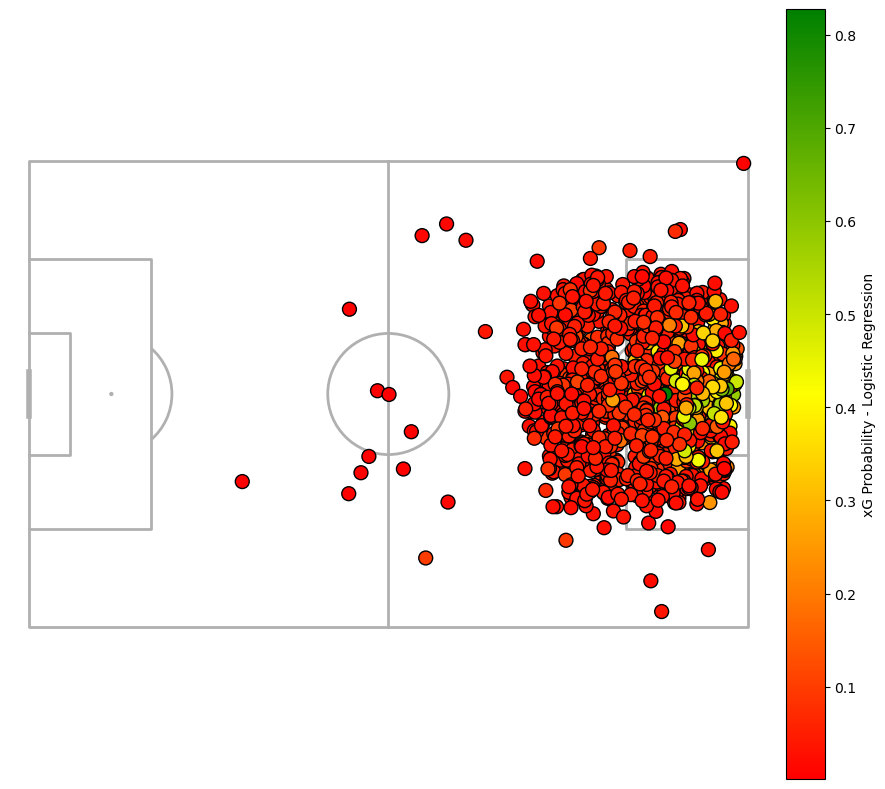

In [43]:
fig, ax = pitch.draw(figsize=(10, 8))

sc = pitch.scatter(
    final_df['x'],
    final_df['y'],
    c = final_df['goal_proba_lr'],
    cmap = cmap,
    edgecolor = 'black',
    s=100,
    ax=ax
)

cbar = plt.colorbar(sc, ax=ax, orientation = "vertical", fraction = 0.2, pad = 0.02)
cbar.set_label('xG Probability - Logistic Regression')

### 3.2. Logistic Regression - Refining it

We can go further and use GridSearch Cross Validation to find the hyperparameters that maximise the model accuracy. 

Note: Running this code produces a lot of warnings regarding max convergence which make reading the file harder so at the end I removed the output.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, classification_report

lr = LogisticRegression()

# Define the hyperparameters to search
param_grid = {
    'penalty': ['l1', 'l2'],  # Type of regularization
    'C': [0.01, 0.1, 1, 10, 100],                  # Regularization strength (smaller = stronger regularization)
    'solver': ['liblinear', 'saga'],               # Solver for optimization
    'max_iter': [100, 500, 1000]                   # Maximum number of iterations
}

# Define the scoring metric
scorer = make_scorer(roc_auc_score, needs_proba=True)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,               # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)          # Use all processors for parallelism

# Fit the model
grid_search.fit(X_train, y_train)

Let's now visualise what the best parameters are and how have we improved the model by using GridSearch CV.

In [45]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC AUC Score:", best_score)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred_proba_lr_improved = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set
roc_auc_lr_improved = roc_auc_score(y_test, y_pred_proba_lr_improved)
print(f"Test ROC AUC Score: {roc_auc_lr_improved:.4f}")

# Print classification report
y_pred = (y_pred_proba_lr_improved > 0.5).astype(int)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best ROC AUC Score: 0.8165644582768211
Test ROC AUC Score: 0.8196

Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      1435
        True       0.62      0.20      0.30       184

    accuracy                           0.89      1619
   macro avg       0.76      0.59      0.62      1619
weighted avg       0.87      0.89      0.87      1619



As we can see, the improvement in the model accuracy by using Cross Validation was minimal.

# 4. Model Building - Random Forest

Different models will produce different results so let's experiment with using a Random Forest as an example.

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Build and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
logloss_rf = log_loss(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
brier_score_rf = brier_score_loss(y_test, y_pred_proba_rf)

print(f"Log Loss: {logloss_rf:.4f}")
print(f"ROC AUC: {roc_auc_rf:.4f}")
print(f"Brier Score: {brier_score_rf:.4f}")


Log Loss: 0.2898
ROC AUC: 0.7934
Brier Score: 0.0827


Let's see what are the top 10 important features in the model.

In [47]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))


Top 10 Most Important Features:
                       Feature  Importance
21               shot_distance    0.125324
25  distance_angle_interaction    0.118749
24       angle_to_goal_degrees    0.116835
10                   BigChance    0.111315
23                  dy_to_goal    0.091166
1                            y    0.089036
0                            x    0.087660
22                  dx_to_goal    0.084771
15                     Penalty    0.023373
2                     Assisted    0.014084


As expected, shot distance, shot angle and the relationship between the two play a major role in predicting if a shot is likely to result in a goal.

## Final remarks

This project was built to demonstrate the different aspects that come into play when creating an xG model such as:
- Importing and cleaning the data
- Feature engineering
- Model building
- Visualing the results

Future work should involve:
- Creating a Data Scraping pipeline so that the models can be trained on a larger number of shots and also using more features
- Training other models that can be more accurate in this context
- Exploring other visualisations to highlight more insights.